<a href="https://colab.research.google.com/github/Chaitrahooli/Machine-Learning-Project/blob/master/Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

**Place an agent in one place of the room(0,1,2,3,4) and goal is to reach outside the room(5)**
[About Q-learning](http://mnemstudio.org/ai/path/q_learning_tutorial.php)

**Step1:-Importing the laibraries**


*   **pylab:-**pylab is a module that belongs to the python mathametics laibrary **Matplotlib**,pylab combines the numerical module numpy with the graphical plotting module pyplot
*   **networkx:-**networkx is a python package for creation,manipulation and study of structure,dynamics and functions of complex network


*   **numpy:-**numpy is a general purpose array processing package,It provides the high performance multidimentional array object,and tools for working with these arrays. 






In [0]:
import numpy as np

**Step2:-Defining the Reward matrix and edges**


In [0]:
edges=[(0,4),(4,5),(0,4),(4,3),(3,1),(1,5),(2,3),(3,1),(1,5),(2,3),(3,4),(4,5),(5,5),(5,1),(5,4),(4,3),(4,0),(3,2),(1,3),(3,2)]
goal=5

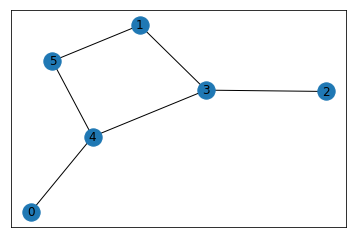

In [152]:
import pylab as pl
import networkx as nx
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 

In the reward matrix -1 indicates that if there is a not path or edges between two nodes,0 indicates that if there is a path or edge between two nodes and 100 indicates that there is direct path between one node to the goal

In [153]:
MATRIX_SIZE = 6
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1
  
for point in edges: 
   # print(point) 
    if point[1] == goal: 
        M[point] = 100
    else: 
        M[point] = 0
  
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
        # reverse of point 
  
M[goal, goal]= 100
print(M) 

[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]


**Step3:-Defining the Q matrix and setup the learning parameter**


*   **gamma:-** The gamma is a learning parameter and its value is in between 0 and 1,if the value of gamma is near to zero then it is nothing but exploitation,if the value of gamma is near to 1 then it is nothing but exploration
*   **exploration:-**we gather more information that might lead us to the best decision for future


*   **exploitation:-**we make best decision in the given current information

here  Q-matrix is initially as zero 





In [0]:
gamma=0.75
Q=np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

**Step4:-Setup the initial state**

initial state is nothing but from where the bot is started to move

In [0]:
initial_state=2

**Step5:-Defining the available actions from the current state**

Let us consider the bot is in the state 2 then there is a two possibilities to reach the goal state,either it mones from(2->3->1->5) or it moves from(2->3->4->5) these are nothing but  possible available actions to reach the goal state 

In [0]:
def available_actions(State):
  current_state_row=M[State,]
  available_action=np.where(current_state_row>=0)[1]
  return available_action

In [0]:
available_action=available_actions(initial_state)

**Step6:-Choosen one of the available action randomly**

Here an agent or bot can choose one available action randomly

In [0]:

def sample_next_action(available_action_range):
  next_action=int(np.random.choice(available_action,1))
  return next_action

In [0]:
action=sample_next_action(available_action)

**Step7:-Update**
 
 here we have to update the Qmatrix for every actions reward gained by the bot

In [160]:

def update(current_state,action,gamma):
  max_index=np.where(Q[action,]==np.max(Q[action,]))[1]
  if max_index.shape[0]>1:
    max_index=int(np.random.choice(max_index,size=1))
  else:
    max_index=int(max_index)
  max_value=Q[action,max_index]
  
  Q[current_state,action]=M[current_state,action]+gamma*max_value
  if(np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return(0)
update(initial_state,action,gamma)

0

**Step8:-Training**

Here we have train the bot around the 1000 iterations

In [0]:
Scores=[]
for i in range(1000):
  current_state=np.random.randint(0,int(Q.shape[0]))
  available_action=available_actions(current_state)
  action=sample_next_action(available_action)
  scores=update(current_state,action,gamma)
  Scores.append(scores)

**Step9:-Testing**

Finally in this step we have to evaluate the most efficiant path the bot can choosen to reach the goal state.

In [162]:
current_state=2
steps=[current_state]
while(current_state!=5):
  next_step_index=np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
  if next_step_index.shape[0]>1:
    next_step_index=int(np.random.choice(next_step_index,size=1))
  else:
    next_step_index=int(next_step_index)
  steps.append(next_step_index)
  current_state=next_step_index

print('most efficiant path')
print(steps)

most efficiant path
[2, 3, 4, 5]
